<a href="https://colab.research.google.com/github/Elifyildizz/Fake-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection?select=fake.csv

In [2]:
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Retrieve and view the True News dataset uploaded to Google Drive
drive.mount('/content/drive')
csv_path_true = "/content/drive/MyDrive/fake-news-dataset/true.csv"
true = pd.read_csv(csv_path_true)
print(true.shape)
true

Mounted at /content/drive
(21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
# Checking for missing values
print("\nMissing Values in columns of True News:")
print(true.isnull().sum())


Missing Values in columns of True News:
title      0
text       0
subject    0
date       0
dtype: int64


In [5]:
# I look at the statistics of the true dataset
desc_table_true = true.describe().transpose()
print(desc_table_true)
# count: Number of non-null values ​​in each column
# unique: Number of unique values ​​in the column
# top: The most frequently repeated (mode) value in the column
# freq: number of occurrences of the value "top" in the column
# There is no mean and standard deviation because it does not contain numerical values

         count unique                                                top  \
title    21417  20826  Factbox: Trump fills top jobs for his administ...   
text     21417  21192  (Reuters) - Highlights for U.S. President Dona...   
subject  21417      2                                       politicsNews   
date     21417    716                                 December 20, 2017    

          freq  
title       14  
text         8  
subject  11272  
date       182  


In [6]:
# Retrieve and view fake news dataset uploaded to google drive
csv_path_fake = "/content/drive/MyDrive/fake-news-dataset/fake.csv"
fake = pd.read_csv(csv_path_fake)
print(fake.shape)
fake

(23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [7]:
# Checking for missing values
print("\nMissing Values in columns of Fake News:")
print(fake.isnull().sum())


Missing Values in columns of Fake News:
title      0
text       0
subject    0
date       0
dtype: int64


In [8]:
# Looking at the statistics of the fake dataset
desc_table_fake = fake.describe().transpose()
print(desc_table_fake)
# count: Number of non-null values ​​in each column
# unique: Number of unique values ​​in the column
# top: Most frequent (mode) value in the column
# freq: Number of occurrences of "top" value in the column
# no mean and standard deviation because it does not contain numeric values

         count unique                                                top  freq
title    23481  17903  MEDIA IGNORES Time That Bill Clinton FIRED His...     6
text     23481  17455                                                      626
subject  23481      6                                               News  9050
date     23481   1681                                       May 10, 2017    46


In [9]:
# These are the median values ​​shown with 50% in the results
# Distribution of 'text' lengths in the fake dataset
print("Measures of Central Tendency for Text Lengths of Fake and True News:")
print("Statistics for Fake News Text Length")
print(fake['text'].apply(len).describe())
print()
# Distribution of 'text' lengths in the true dataset
print("Statistics for True News Text Length")
print(true['text'].apply(len).describe())

Measures of Central Tendency for Text Lengths of Fake and True News:
Statistics for Fake News Text Length
count    23481.000000
mean      2547.396235
std       2532.884399
min          1.000000
25%       1433.000000
50%       2166.000000
75%       3032.000000
max      51794.000000
Name: text, dtype: float64

Statistics for True News Text Length
count    21417.000000
mean      2383.278517
std       1684.835730
min          1.000000
25%        914.000000
50%       2222.000000
75%       3237.000000
max      29781.000000
Name: text, dtype: float64


In [10]:
# Adding lengths as columns to DataFrame
fake['text_length'] = fake['text'].apply(len)
true['text_length'] = true['text'].apply(len)

# Calculation of Measures of Dispersion for Fake News
fake_variance = fake['text_length'].var()
fake_range = fake['text_length'].max() - fake['text_length'].min()

# Calculation of Measures of Dispersion for True News
true_variance = true['text_length'].var()
true_range = true['text_length'].max() - true['text_length'].min()

# Displaying results
print("Measures of Dispersion for Fake News Text Length:")
print("Variance:", fake_variance)
print("Range:", fake_range)
print()
print("Measures of Dispersion for True News Text Length:")
print("Variance:", true_variance)
print("Range:", true_range)
print()

Measures of Dispersion for Fake News Text Length:
Variance: 6415503.379958561
Range: 51793

Measures of Dispersion for True News Text Length:
Variance: 2838671.4383473
Range: 29780



# Exploratary Data Analysis

## **Research Question 1:**
Are there significant differences in the distribution of text lengths between Fake and True news?

In [11]:
# Comparison of news length in two datasets
fig = px.histogram(fake, x='text_length', color_discrete_sequence=['purple'], title='Text Length Distribution for Fake News')
fig.add_trace(px.histogram(true, x='text_length', color_discrete_sequence=['green'], title='Text Length Distribution for Fake News').update_traces(opacity=0.7).data[0])

fig.update_layout(legend=dict(traceorder='reversed'))
fig.show()

In [12]:
# Calculation of Measures of Shape for Fake News text length
fake_skewness = skew(fake['text_length'])
fake_kurt = kurtosis(fake['text_length'])

# Calculation of Measures of Shape for True News text length
true_skewness = skew(true['text_length'])
true_kurt = kurtosis(true['text_length'])

# Displaying results
print("Measures of Shape for Fake News Text Length:")
print("Skewness:", fake_skewness)
print("Kurtosis:", fake_kurt)
print()
print("Measures of Shape for True News Text Length:")
print("Skewness:", true_skewness)
print("Kurtosis:", true_kurt)

Measures of Shape for Fake News Text Length:
Skewness: 6.687570876860871
Kurtosis: 81.20956860474436

Measures of Shape for True News Text Length:
Skewness: 1.392543425506421
Kurtosis: 7.031108259876653


In [13]:
# Checking whether there are significant differences in the distribution of text lengths between Fake and True news
fig = px.box(fake, y='text_length', color_discrete_sequence=['purple'], title='Box Plot of Text Lengths for Fake News')
fig.add_trace(px.box(true, y='text_length', color_discrete_sequence=['green'], title='Box Plot of Text Lengths for True News').update_traces(opacity=0.7).data[0])
fig.show()

In [14]:
# Distribution of 'title' lengths in the fake dataset
print("Measures of Central Tendency for Title Lengths of Fake and True News:")
print("Statistics for Fake News Title Length")
print(fake['title'].apply(len).describe())
print()

# Distribution of 'title' lengths in the true dataset
print("Statistics for True News Title Length")
print(true['title'].apply(len).describe())

Measures of Central Tendency for Title Lengths of Fake and True News:
Statistics for Fake News Title Length
count    23481.000000
mean        94.198032
std         27.184433
min          8.000000
25%         77.000000
50%         90.000000
75%        105.000000
max        286.000000
Name: title, dtype: float64

Statistics for True News Title Length
count    21417.000000
mean        64.667881
std          9.168999
min         26.000000
25%         59.000000
50%         64.000000
75%         70.000000
max        133.000000
Name: title, dtype: float64


In [15]:
# Adding lengths as columns to DataFrame
fake['title_length'] = fake['title'].apply(len)
true['title_length'] = true['title'].apply(len)

# Calculation of Measures of Dispersion for Fake News
fake_variance_title = fake['title_length'].var()
fake_range_title = fake['title_length'].max() - fake['title_length'].min()

# Calculation of Measures of Dispersion for True News
true_variance_title = true['title_length'].var()
true_range_title = true['title_length'].max() - true['title_length'].min()
# Displaying results
print("Measures of Dispersion for Fake News Title Length:")
print("Variance:", fake_variance_title)
print("Range:", fake_range_title)
print()
print("Measures of Dispersion for True News Title Length:")
print("Variance:", true_variance_title)
print("Range:", true_range_title)
print()

Measures of Dispersion for Fake News Title Length:
Variance: 738.9934049871875
Range: 278

Measures of Dispersion for True News Title Length:
Variance: 84.07053768691648
Range: 107



## **Research Quesion 2:**
Are there significant differences in the distribution of title lengths between Fake and True news?


In [16]:
# Comparison of title length in two datasets
fig = px.histogram(fake, x='title_length', color_discrete_sequence=['purple'], title='Title Length Distribution for Fake News')
fig.add_trace(px.histogram(true, x='title_length', color_discrete_sequence=['green'], title='Title Length Distribution for True News').update_traces(opacity=0.7).data[0])
fig.show()

In [17]:
# Calculation of Measures of Shape for Fake News title length
fake_skewness_title = skew(fake['title_length'])
fake_kurt_title = kurtosis(fake['title_length'])

# Calculation of Measures of Shape for True News title length
true_skewness_title = skew(true['title_length'])
true_kurt_title = kurtosis(true['title_length'])

# Displaying results
print("Measures of Shape for Fake News Title Length:")
print("Skewness:", fake_skewness_title)
print("Kurtosis:", fake_kurt_title)
print()
print("Measures of Shape for True News Title Length:")
print("Skewness:", true_skewness_title)
print("Kurtosis:", true_kurt_title)

Measures of Shape for Fake News Title Length:
Skewness: 1.1440022855341578
Kurtosis: 2.5453948760817955

Measures of Shape for True News Title Length:
Skewness: 0.24133060620917826
Kurtosis: 0.8447248519823263


In [18]:
# Checking whether there are significant differences in the distribution of title lengths between Fake and True news
fig = px.box(fake, y='title_length', color_discrete_sequence=['purple'], title='Box Plot of Title Lengths for Fake News', )
fig.add_trace(px.box(true, y='title_length', color_discrete_sequence=['green'], title='Box Plot of Title Lengths for True News').update_traces(opacity=0.7).data[0])
fig.show()

## **Research Question 3:**
Is there any correlation btw title length and text lengths in different news types?

In [19]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Fake News', 'True News'])

scatter_fake = go.Scatter(x=fake['title_length'], y=fake['text_length'], mode='markers', marker=dict(color='purple'), name='Fake News')
fig.add_trace(scatter_fake, row=1, col=1)

scatter_true = go.Scatter(x=true['title_length'], y=true['text_length'], mode='markers', marker=dict(color='green'), name='True News')
fig.add_trace(scatter_true, row=1, col=2)

fig.update_layout(title_text='Correlation Between Title and Text Lengths', showlegend=True)
fig.show()

In [20]:
correlation_fake = np.corrcoef(fake['title_length'], fake['text_length'])[0, 1]
correlation_true = np.corrcoef(true['title_length'], true['text_length'])[0, 1]

# Print correlation coefficients
print(f"Pearson Correlation Coefficient (Fake News): {correlation_fake:.2f}")
print(f"Pearson Correlation Coefficient (True News): {correlation_true:.2f}")

Pearson Correlation Coefficient (Fake News): 0.03
Pearson Correlation Coefficient (True News): -0.05


## **Research Question 4:**
What is the temporal patterns of fake news over time?

In [21]:
# Fake news counts across dates (Time series visualization)
combined_dates = fake['date']

fig = px.line(combined_dates.value_counts().sort_index(), title='Temporal Patterns of Fake News Over Time',
              labels={'value': 'Count of Fake News', 'index': 'Date'}, line_shape='linear', color_discrete_sequence=['purple'])

fig.update_layout(width=1100, height=600)
fig.show()

##**Research Question 5:**
What is the subject distribution for news?

In [22]:
# DATA MUNGING
# the unique subjects in the 'subject' column for the fake news
print(fake['subject'].unique())

['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


In [23]:
print("\nNumber of Fake News Articles by Subject:")
print(fake['subject'].value_counts())


Number of Fake News Articles by Subject:
subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


In [24]:
# the unique subjects in the 'subject' column for the true news
print(true['subject'].unique())

['politicsNews' 'worldnews']


In [25]:
print("\nNumber of True News Articles by Subject:")
print(true['subject'].value_counts())


Number of True News Articles by Subject:
subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64


In [26]:
# Subject Bar Plot for Data
combined_subjects = pd.concat([fake['subject'], true['subject']])

fig = px.bar(combined_subjects.value_counts(), x=combined_subjects.value_counts().index, y=combined_subjects.value_counts().values,
             color=combined_subjects.value_counts().index, title='Subject Distribution for Fake and True News')
fig.update_layout(xaxis_title='Subject', yaxis_title='Number of Articles')
fig.show()

In [27]:
# DATA PREPARING
# Add columns
fake['label'] = 'Fake'
true['label'] = 'True'

In [28]:
# Combining and mixing data sets and viewing the data set
data = pd.concat([fake, true]).reset_index(drop = True)
from sklearn.utils import shuffle
df = shuffle(data)
df = df.reset_index(drop=True)
df

,title,text,subject,date,text_length,title_length,label
0,London mayor calls on British foreign minister...,LONDON (Reuters) - London Mayor Sadiq Khan cal...,worldnews,"November 12, 2017",279,64,True
1,China foreign minister : peaceful agreement 'o...,UNITED NATIONS (Reuters) - Chinese Foreign Min...,politicsNews,"April 28, 2017",490,78,True
2,"Merkel preaches tolerance, religious freedom a...","WITTENBERG, Germany (Reuters) - Invoking the s...",worldnews,"October 31, 2017",1943,68,True
3,Turkey arrests four people over explosion at T...,ANKARA (Reuters) - Turkish authorities arreste...,worldnews,"October 14, 2017",587,69,True
4,Russia says too early to decide on U.N. resolu...,MOSCOW (Reuters) - Russian Foreign Minister Se...,worldnews,"September 8, 2017",261,75,True
...,...,...,...,...,...,...,...
44893,"Defiant Syrian envoy blames West, Saudis and U...",GENEVA (Reuters) - Syrian government negotiato...,worldnews,"December 14, 2017",2247,68,True
44894,Trump says considering having both Powell and ...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"October 20, 2017",541,65,True
44895,Texas Senate votes to curb transgender access ...,"AUSTIN, Texas (Reuters) - The Republican-contr...",politicsNews,"July 26, 2017",3035,65,True
44896,WATCH: Colin Kaepernick’s Worst Nightmare [Video],You might remember this bright moment from whe...,politics,"Nov 18, 2017",3196,49,Fake


In [29]:
# When examine the new dataset, see that the length columns  created for use in data visualization are non-functional.
# Additionally, since there is no integrity between the subjects, remove these columns from the dataset.
# Remove the date information because it will not be useful to us in future transactions.
#Data munging
df.drop(["subject", "text_length", "title_length", "date"],axis=1,inplace=True)

# Combine title and text columns into a single column to collect news content in one place
df["news"] = df["title"] + ": " + df["text"]

# Remove the title and text columns from the dataset
df = df.drop(["title", "text"],axis=1)

df

,label,news
0,True,London mayor calls on British foreign minister...
1,True,China foreign minister : peaceful agreement 'o...
2,True,"Merkel preaches tolerance, religious freedom a..."
3,True,Turkey arrests four people over explosion at T...
4,True,Russia says too early to decide on U.N. resolu...
...,...,...
44893,True,"Defiant Syrian envoy blames West, Saudis and U..."
44894,True,Trump says considering having both Powell and ...
44895,True,Texas Senate votes to curb transgender access ...
44896,Fake,WATCH: Colin Kaepernick’s Worst Nightmare [Vid...


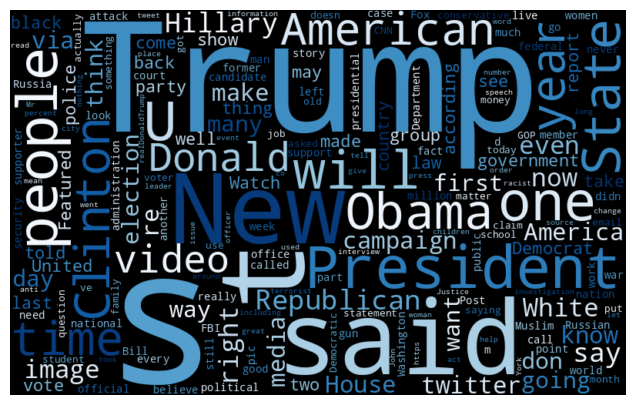

In [30]:
# Word cloud for fake news
fake_data = df[df["label"] == "Fake"]
all_words = ' '.join([news for news in fake_data.news])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 250,
                          colormap='Blues',
                          collocations = False).generate(all_words)

plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
def plot_word_frequencies(data, title):
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    X = vectorizer.fit_transform(data)
    words = vectorizer.get_feature_names_out()
    word_counts = X.sum(axis=0).A1

    fig = make_subplots(rows=1, cols=1, subplot_titles=[f'Top Words - {title}'])

    # Bar plot for word frequencies
    bar_trace = go.Bar(x=word_counts, y=words, orientation='h', marker=dict(color='rgba(20, 55, 250, 0.7)'))
    fig.add_trace(bar_trace, row=1, col=1)

    fig.update_layout(showlegend=False)
    fig.show()

plot_word_frequencies(df[df['label'] == 'Fake']['news'], 'Fake News')

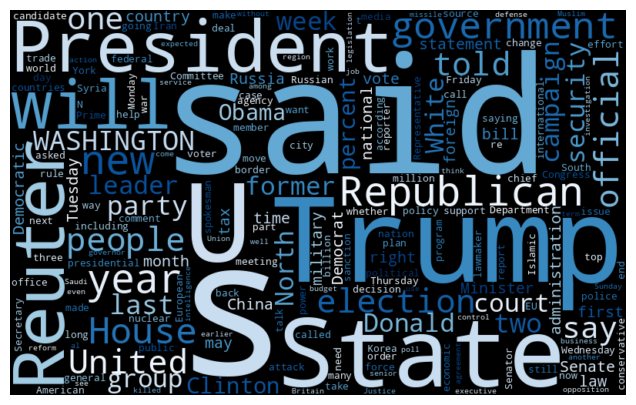

In [32]:
# Word cloud for true news
fake_data = df[df["label"] == "True"]
all_words = ' '.join([news for news in fake_data.news])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 250,
                          colormap='Blues',
                          collocations = False).generate(all_words)

plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Research Quesiton 6:**
What are the most used words in true news?


In [33]:
plot_word_frequencies(df[df['label'] == 'True']['news'], 'True News')

# **Data Cleaning**

In [34]:
# DATA CLEANING
# Converting all letters to lowercase:
df['news'] = df['news'].str.lower()

In [35]:
# Removing URLs:
import string
import re
import nltk

def remove_urls(text):
    url_pattern = re.compile(r'(https?://\S+)|(www\.\S+)|(\S+\.\S+/\S+)')
    return url_pattern.sub(r'', text)

df['news'] = df['news'].apply(remove_urls)

In [36]:
# Removing emojis and symbols:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                                  u"\U0001F600-\U0001F64F"  # emoticons
                                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                  u"\U00002702-\U000027B0"  # other miscellaneous symbols
                                  u"\U000024C2-\U0001F251"  # enclosed characters
                                "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

df['news'] = df['news'].apply(remove_emoji)

In [37]:
# Remove punctuation marks
df['news'] = df['news'].str.replace('[^\w\s]','')

In [38]:
# Removing Stop Words:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stpwrds = set(stopwords.words('english'))

def remove_stopwords(text):
  text = ' '.join([word for word in text.split() if word not in stpwrds])
  return text

df['news'] = df['news'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [39]:
# Finding word roots to improve language analysis (LEMMATIZING):
nltk.download('wordnet', '/root/nltk_data/')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

def lemmatize_word(text):
  return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df['news'] = df['news'].apply(lemmatize_word)

[nltk_data] Downloading package wordnet to /root/nltk_data/...


In [40]:
# CLEANING TOKENS
def cleanTokens(text):
   ReapeatTokens =  " ".join( [ re.sub(r'(\w)\1{2,}', r'\1', word) for word in text.split()] )
   digitTokens =  " ".join( [ word for word in ReapeatTokens.split() if not re.search(r'\d', word) ] )
   underscoreTokens =  " ".join( [ word for word in digitTokens.split() if not re.search(r'_|\w*_\w*', word) ] )
   specialTokens =  " ".join( [ word for word in underscoreTokens.split() if not re.search(r'[^a-zA-Z0-9\s]', word) ] )
   return " ".join( [ word for word in specialTokens.split() if len(word) > 2 ] )

df['news'] = df['news'].apply(cleanTokens)

In [41]:
# view new dataset
df

,label,news
0,True,london mayor call british foreign minister joh...
1,True,china foreign minister peaceful agreement righ...
2,True,merkel preaches religious freedom reformation ...
3,True,turkey arrest four people explosion tupras ank...
4,True,russia say early decide resolution north mosco...
...,...,...
44893,True,defiant syrian envoy blame saudi peace talk ge...
44894,True,trump say considering powell taylor serve wash...
44895,True,texas senate vote curb transgender access publ...
44896,Fake,colin worst nightmare might remember bright mo...


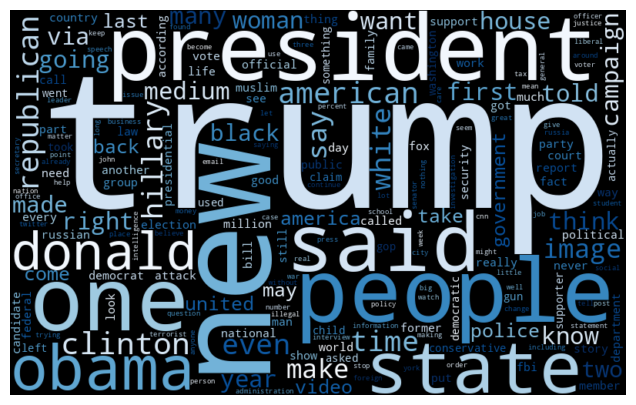

In [42]:
# Checking WordClouds after data cleaning
# Word cloud for fake news
fake_data = df[df["label"] == "Fake"]
all_words = ' '.join([news for news in fake_data.news])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 250,
                          colormap='Blues',
                          collocations = False).generate(all_words)

plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

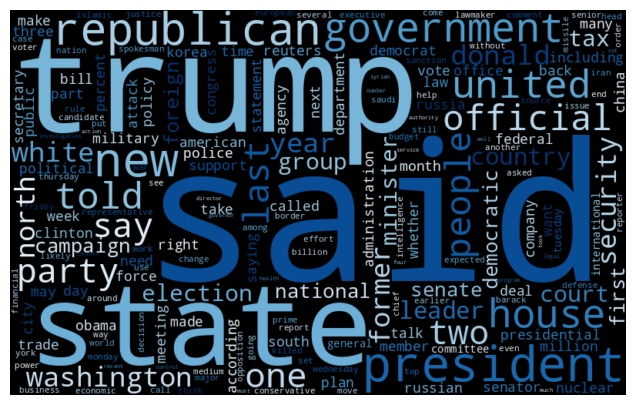

In [43]:
# Word cloud for true news
true_data = df[df["label"] == "True"]
all_words = ' '.join([news for news in true_data.news])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 250,
                          colormap='Blues',
                          collocations = False).generate(all_words)

plt.figure(figsize=(8,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Data Pre-Process**

In [44]:
# Before training Machine Learning models, separate the last 1000 data of the dataset to later test the best performing model with new data
new = df.tail(1000)
new

,label,news
43898,Fake,trump asked want sex trump threatening press s...
43899,Fake,florida sheriff exploit desperate hurricane ar...
43900,True,message north korean missile japan president d...
43901,Fake,active shooter cascade mall century wire say s...
43902,True,supreme court revival trump travel ban draw su...
...,...,...
44893,True,defiant syrian envoy blame saudi peace talk ge...
44894,True,trump say considering powell taylor serve wash...
44895,True,texas senate vote curb transgender access publ...
44896,Fake,colin worst nightmare might remember bright mo...


label
Fake    498
True    502
Name: news, dtype: int64


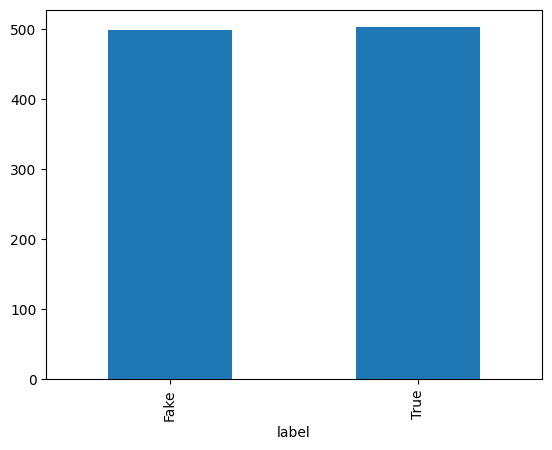

In [47]:
# Displaying the number of labels of the new dataset created for testing
# How many fake and real labels in new test data?
print(new.groupby(['label'])['news'].count())
new.groupby(['label'])['news'].count().plot(kind="bar")
plt.show()

In [48]:
# Saving the remaining data in a new dataFrame to use in training the models
df2 = df.iloc[:-1000]
df2
# When examine the IDs of the data, see that the data is separated successfully

,label,news
0,True,london mayor call british foreign minister joh...
1,True,china foreign minister peaceful agreement righ...
2,True,merkel preaches religious freedom reformation ...
3,True,turkey arrest four people explosion tupras ank...
4,True,russia say early decide resolution north mosco...
...,...,...
43893,True,send extra fighter police baltic sky russian s...
43894,True,one republican fast track plan undo obama wash...
43895,True,india appoints new defence rejigs cabinet refo...
43896,True,canada say ready come nafta talk ottawa canada...


In [49]:
# Label Encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['label'] = le.fit_transform(df2['label'])

df2

<ipython-input-49-a7b323cf512f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,label,news
0,1,london mayor call british foreign minister joh...
1,1,china foreign minister peaceful agreement righ...
2,1,merkel preaches religious freedom reformation ...
3,1,turkey arrest four people explosion tupras ank...
4,1,russia say early decide resolution north mosco...
...,...,...
43893,1,send extra fighter police baltic sky russian s...
43894,1,one republican fast track plan undo obama wash...
43895,1,india appoints new defence rejigs cabinet refo...
43896,1,canada say ready come nafta talk ottawa canada...


# **Model Selection**

In [50]:
# TRAIN AND TEST:
x_train, x_test, y_train, y_test = train_test_split(df2['news'], df2.label, test_size=0.2, random_state=42)

In [51]:
print("Train Set Size:", len(x_train))
print("Test Set Size:", len(x_test))

Train Set Size: 35118
Test Set Size: 8780


In [52]:
# View label counts
print("Label Counts in TRAIN:")
print(y_train.value_counts().rename(index={0: 'fake', 1: 'true'}))

print("\nLabel Counts in TEST:")
print(y_test.value_counts().rename(index={0: 'fake', 1: 'true'}))

Label Counts in TRAIN:
label
fake    18375
true    16743
Name: count, dtype: int64

Label Counts in TEST:
label
fake    4608
true    4172
Name: count, dtype: int64


In [53]:
# LOGISTIC REGRESSION
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

pipe_LR = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model_LR = pipe_LR.fit(x_train, y_train)


prediction_LR = model_LR.predict(x_test)

print("Scores for Logistic Regression:")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction_LR)*100,3)))
print("precision: {}%".format(round(precision_score(y_test, prediction_LR)*100,3)))
print("recall: {}%".format(round(recall_score(y_test, prediction_LR)*100,3)))
print("f1_score: {}%".format(round(f1_score(y_test, prediction_LR)*100,3)))

Scores for Logistic Regression:
accuracy: 97.608%
precision: 97.37%
recall: 97.603%
f1_score: 97.486%


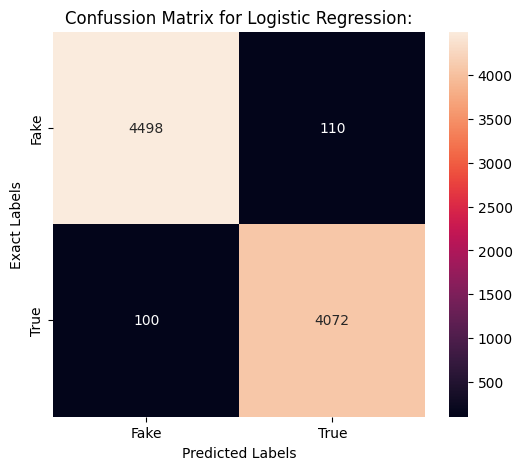

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_LR = confusion_matrix(y_test, prediction_LR)

class_names = ["Fake", "True"]

f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix_LR, annot=True, fmt=".0f", ax=ax, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("Exact Labels")
plt.title("Confussion Matrix for Logistic Regression:")
plt.show()

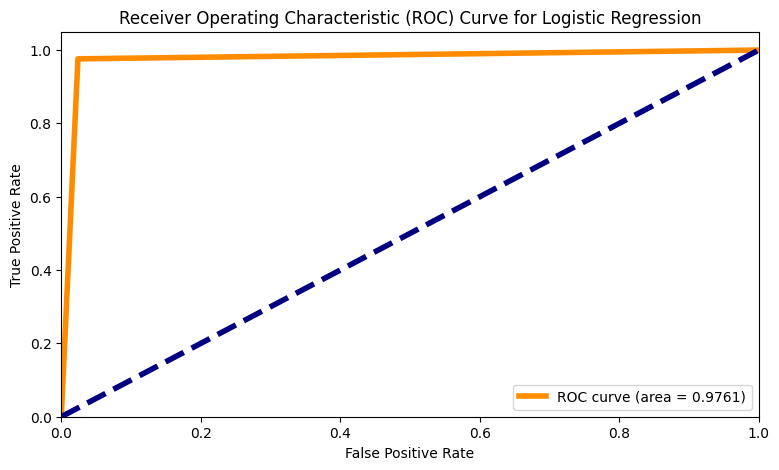

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, prediction_LR)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(9, 5))
plt.plot(fpr, tpr, color='darkorange', lw=4, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [56]:
# DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])

# Fitting the model
model_DT = pipe_DT.fit(x_train, y_train)


prediction_DT = model_DT.predict(x_test)

print("Scores for Desicion Tree Classifier:")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction_DT)*100,3)))
print("precision: {}%".format(round(precision_score(y_test, prediction_DT)*100,3)))
print("recall: {}%".format(round(recall_score(y_test, prediction_DT)*100,3)))
print("f1_score: {}%".format(round(f1_score(y_test, prediction_DT)*100,3)))

Scores for Desicion Tree Classifier:
accuracy: 92.54%
precision: 93.668%
recall: 90.412%
f1_score: 92.011%


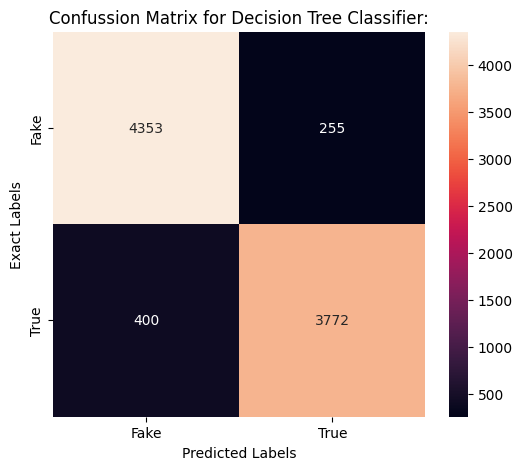

In [57]:
conf_matrix_DT = confusion_matrix(y_test, prediction_DT)

class_names = ["Fake", "True"]

f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix_DT, annot=True, fmt=".0f", ax=ax, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("Exact Labels")
plt.title("Confussion Matrix for Decision Tree Classifier:")
plt.show()

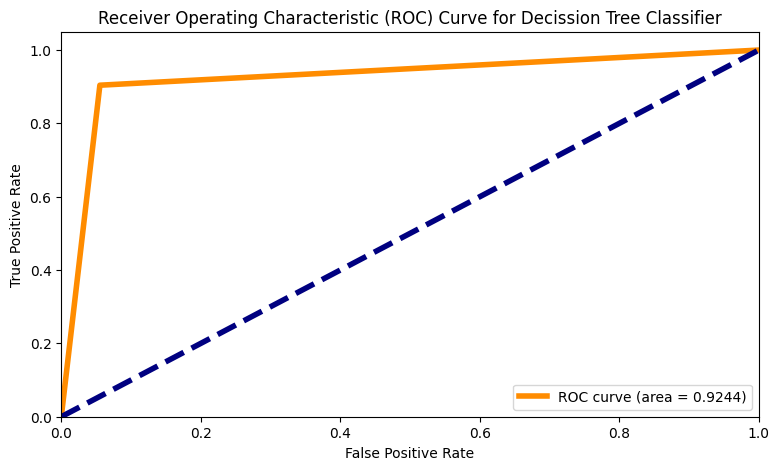

In [58]:
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, prediction_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)

plt.figure(figsize=(9, 5))
plt.plot(fpr_DT, tpr_DT, color='darkorange', lw=4, label='ROC curve (area = {:.4f})'.format(roc_auc_DT))
plt.plot([0, 1], [0, 1], color='navy', lw=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decission Tree Classifier')
plt.legend(loc='lower right')
plt.show()

In [59]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

pipe_RF = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

# Fitting the model
model_RF = pipe_RF.fit(x_train, y_train)


prediction_RF = model_RF.predict(x_test)

print("Scores for Random Forest Classifier:")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction_RF)*100,3)))
print("precision: {}%".format(round(precision_score(y_test, prediction_RF)*100,3)))
print("recall: {}%".format(round(recall_score(y_test, prediction_RF)*100,3)))
print("f1_score: {}%".format(round(f1_score(y_test, prediction_RF)*100,3)))

Scores for Random Forest Classifier:
accuracy: 97.472%
precision: 97.705%
recall: 96.956%
f1_score: 97.329%


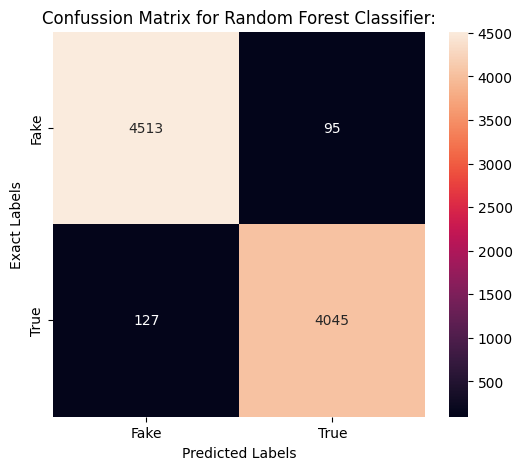

In [60]:
conf_matrix_RF = confusion_matrix(y_test, prediction_RF)

class_names = ["Fake", "True"]

f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix_RF, annot=True, fmt=".0f", ax=ax, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("Exact Labels")
plt.title("Confussion Matrix for Random Forest Classifier:")
plt.show()

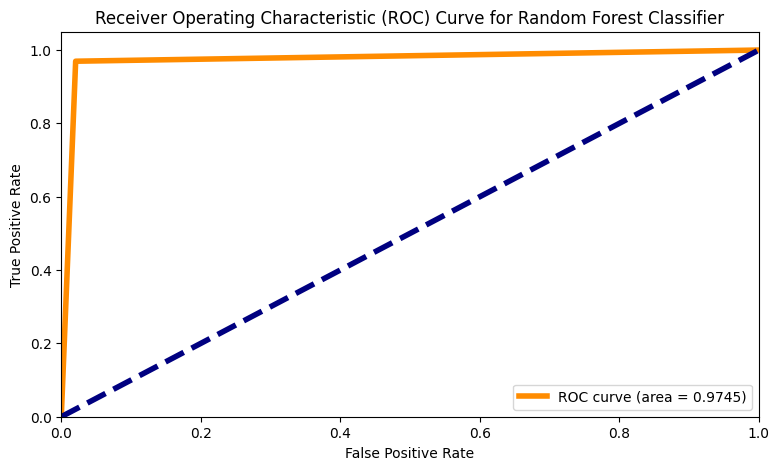

In [61]:
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, prediction_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)

plt.figure(figsize=(9, 5))
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=4, label='ROC curve (area = {:.4f})'.format(roc_auc_RF))
plt.plot([0, 1], [0, 1], color='navy', lw=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

In [63]:
# NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes için bir Pipeline oluşturun
pipe_NB = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('model', MultinomialNB())])

# Training model
model_NB = pipe_NB.fit(x_train, y_train)

# Make predictions on the test set
prediction_NB = model_NB.predict(x_test)

# Print performance metrics
print("Scores for Naive Bayes Classifier:")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction_NB)*100, 3)))
print("precision: {}%".format(round(precision_score(y_test, prediction_NB)*100, 3)))
print("recall: {}%".format(round(recall_score(y_test, prediction_NB)*100, 3)))
print("f1_score: {}%".format(round(f1_score(y_test, prediction_NB)*100, 3)))

Scores for Naive Bayes Classifier:
accuracy: 93.178%
precision: 93.121%
recall: 92.474%
f1_score: 92.796%


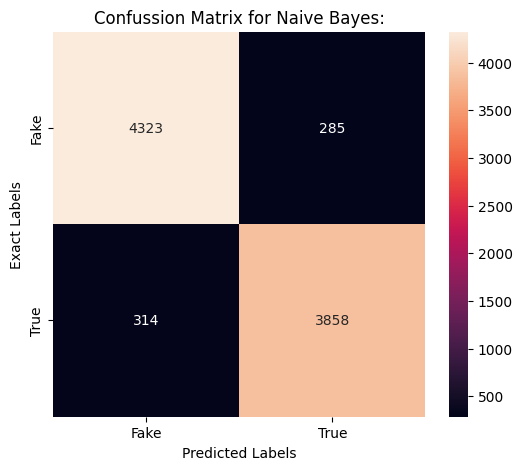

In [64]:
conf_matrix_NB = confusion_matrix(y_test, prediction_NB)

class_names = ["Fake", "True"]

f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix_NB, annot=True, fmt=".0f", ax=ax, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("Exact Labels")
plt.title("Confussion Matrix for Naive Bayes:")
plt.show()

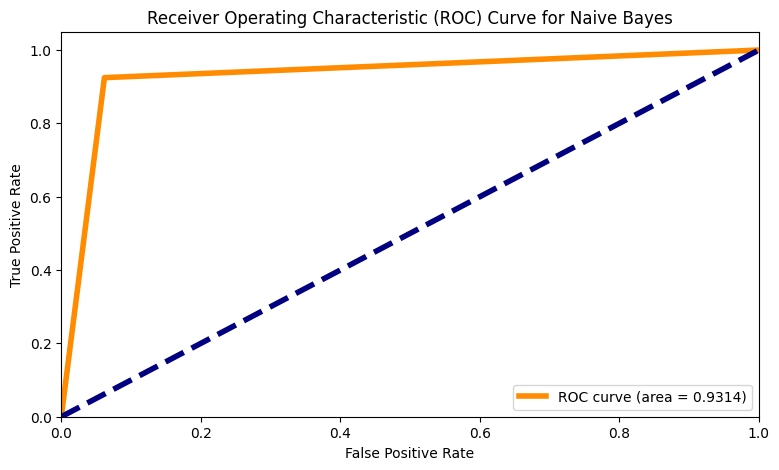

In [65]:
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, prediction_NB)
roc_auc_NB = auc(fpr_NB, tpr_NB)

plt.figure(figsize=(9, 5))
plt.plot(fpr_NB, tpr_NB, color='darkorange', lw=4, label='ROC curve (area = {:.4f})'.format(roc_auc_NB))
plt.plot([0, 1], [0, 1], color='navy', lw=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

In [66]:
accuracy_LR = accuracy_score(y_test, prediction_LR)*100,3
precision_LR = precision_score(y_test, prediction_LR)*100,3
recall_LR = recall_score(y_test, prediction_LR)*100,3
f1_score_LR = f1_score(y_test, prediction_LR)*100,3

accuracy_DT = accuracy_score(y_test, prediction_DT)*100,3
precision_DT = precision_score(y_test, prediction_DT)*100,3
recall_DT = recall_score(y_test, prediction_DT)*100,3
f1_score_DT = f1_score(y_test, prediction_DT)*100,3

accuracy_RF = accuracy_score(y_test, prediction_RF)*100,3
precision_RF = precision_score(y_test, prediction_RF)*100,3
recall_RF = recall_score(y_test, prediction_RF)*100,3
f1_score_RF = f1_score(y_test, prediction_RF)*100,3

accuracy_NB = accuracy_score(y_test, prediction_NB)*100,3
precision_NB = precision_score(y_test, prediction_NB)*100,3
recall_NB = recall_score(y_test, prediction_NB)*100,3
f1_score_NB = f1_score(y_test, prediction_NB)*100,3

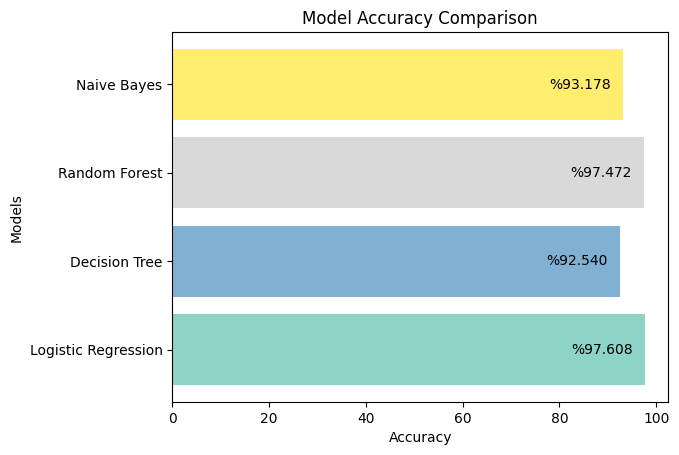

In [67]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes']

accuracy_values = [accuracy_LR, accuracy_DT, accuracy_RF, accuracy_NB]
accuracy_values = [item[0] for item in accuracy_values]

colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

plt.barh(models, accuracy_values, color=colors)

gap = 2.5

for i in range(len(models)):
    plt.text(accuracy_values[i] - gap, i, f'%{accuracy_values[i]:.3f}', ha='right', va='center', color='black', fontsize=10)

plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Model Accuracy Comparison')

plt.show()

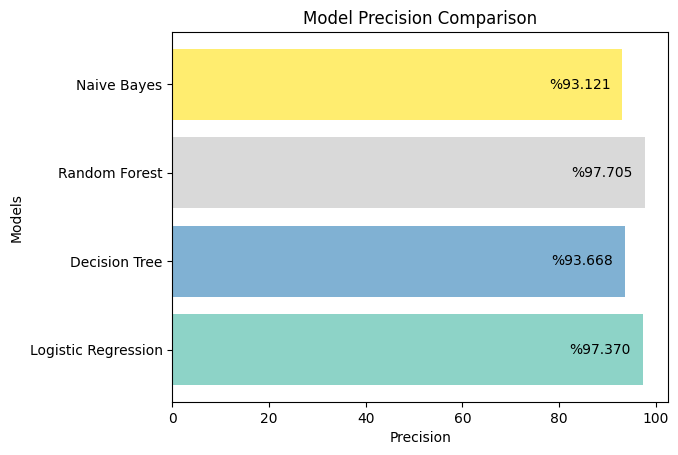

In [68]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes']

precision_values = [precision_LR, precision_DT, precision_RF, precision_NB]
precision_values = [item[0] for item in precision_values]

colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

plt.barh(models, precision_values, color=colors)

gap = 2.5

for i in range(len(models)):
    plt.text(precision_values[i] - gap, i, f'%{precision_values[i]:.3f}', ha='right', va='center', color='black', fontsize=10)

plt.xlabel('Precision')
plt.ylabel('Models')
plt.title('Model Precision Comparison')

plt.show()

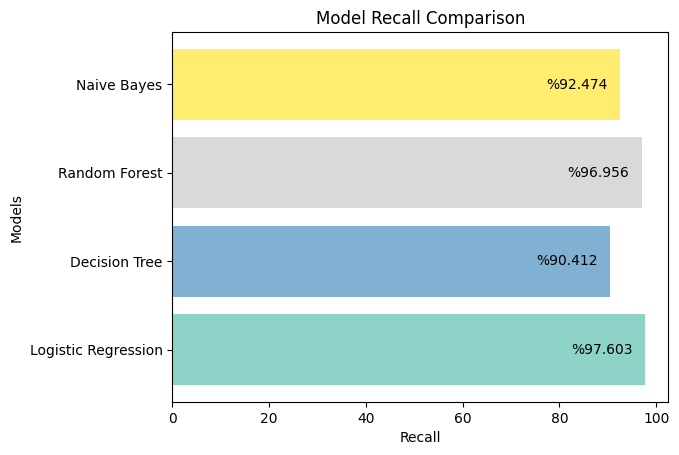

In [69]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes']

recall_values = [recall_LR, recall_DT, recall_RF, recall_NB]
recall_values = [item[0] for item in recall_values]

colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

plt.barh(models, recall_values, color=colors)

gap = 2.5

for i in range(len(models)):
    plt.text(recall_values[i] - gap, i, f'%{recall_values[i]:.3f}', ha='right', va='center', color='black', fontsize=10)

plt.xlabel('Recall')
plt.ylabel('Models')
plt.title('Model Recall Comparison')

plt.show()

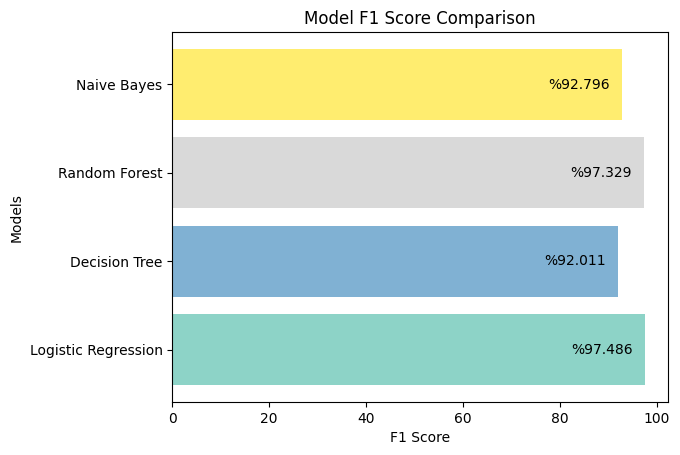

In [70]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes']

f1_score_values = [f1_score_LR, f1_score_DT, f1_score_RF, f1_score_NB]
f1_score_values = [item[0] for item in f1_score_values]

colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

plt.barh(models, f1_score_values, color=colors)

gap = 2.5

for i in range(len(models)):
    plt.text(f1_score_values[i] - gap, i, f'%{f1_score_values[i]:.3f}', ha='right', va='center', color='black', fontsize=10)

plt.xlabel('F1 Score')
plt.ylabel('Models')
plt.title('Model F1 Score Comparison')

plt.show()

In [71]:
# Get the best results from model training with Logistic Regression
# Want to test the Logistic Regression model trained on the 1000 data allocated
# To remove the label column in the new dataset before testing
# Before removing labels, create a copy of the dataset

new_copy = new.copy()

# DELETING LABELS FROM COPY DATASET
new_copy = new_copy.drop('label', axis=1)

new_copy

,news
43898,trump asked want sex trump threatening press s...
43899,florida sheriff exploit desperate hurricane ar...
43900,message north korean missile japan president d...
43901,active shooter cascade mall century wire say s...
43902,supreme court revival trump travel ban draw su...
...,...
44893,defiant syrian envoy blame saudi peace talk ge...
44894,trump say considering powell taylor serve wash...
44895,texas senate vote curb transgender access publ...
44896,colin worst nightmare might remember bright mo...


In [81]:
# Prediction Labels with Logistic Regression
predictions = model_LR.predict(new_copy['news'])

label_mapping = {0: 'Fake', 1: 'True'}
predictions_labels = np.vectorize(label_mapping.get)(predictions)

new_copy['predictions'] = predictions_labels

print("Predictions for New Data:")
new_copy

Predictions for New Data:


,news,predictions
43898,trump asked want sex trump threatening press s...,Fake
43899,florida sheriff exploit desperate hurricane ar...,Fake
43900,message north korean missile japan president d...,True
43901,active shooter cascade mall century wire say s...,Fake
43902,supreme court revival trump travel ban draw su...,True
...,...,...
44893,defiant syrian envoy blame saudi peace talk ge...,True
44894,trump say considering powell taylor serve wash...,True
44895,texas senate vote curb transgender access publ...,True
44896,colin worst nightmare might remember bright mo...,Fake


predictions
Fake    500
True    500
Name: news, dtype: int64


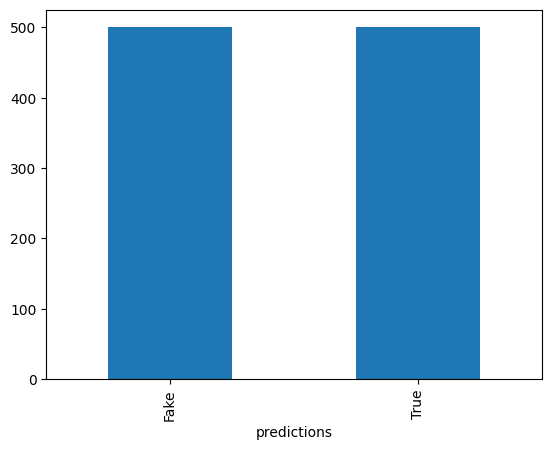

In [82]:
# Displaying the number of labels of the copy dataset tested
# How many fake and real labels in new test data?
print(new_copy.groupby(['predictions'])['news'].count())
new_copy.groupby(['predictions'])['news'].count().plot(kind="bar")
plt.show()

In [83]:
# Accuracy of Test Result
accuracy_test = accuracy_score(new['label'], new_copy['predictions'])

print(f"Accuracy of Test Result: %{accuracy_test*100}")

Accuracy of Test Result: %97.39999999999999
